In [1]:
import os
import sys
import glob
import shutil
import datetime
import platform
from functools import reduce

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from astropy import units as u
from astropy.time import Time

from scipy import signal

In [3]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.15.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

sys.path.append(PACK_DIR)
from PRAO import *

In [4]:
def flatter(data, polynomialOrder=15):

    ## Применяем медианную фильтрацию с максимальным шагом:
    res_filter = data # signal.medfilt(data, kernel_size=29)
    # Фитируем получившийся массив:
    xData = range(len(res_filter))
    yData = res_filter
    # curve fit the data
    fittedParameters = np.polyfit(xData, yData, polynomialOrder)
    xModel = np.linspace(min(xData), max(xData), len(xData))
    yModel = np.polyval(fittedParameters, xModel)

    return yModel

In [5]:
gp_table = pd.read_table('crab_gp_kaz_10_2010-2019_calib_dina_2019-11-14.csv', sep='\t')

In [6]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.863215,37.642590,./final_dataset/\obs_data_real_calib\13.02.201...,1,51612,240.462995,8.41105,63.16855,./final_dataset/gp_plot_real_calib/13.02.2010_...,./final_dataset/gp_plot_txt_real_calib/13.02.2...,0,0.572546
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,11420,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.738857
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,54882,163.337400,1.40060,4.54450,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.364402
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,18010,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.671781
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1,36044,122.328620,3.72500,16.03985,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0,0.382555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24559,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,32643,236.608495,2.65965,11.05580,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0,0.339548
24560,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,76505,234.382965,8.32910,11.41340,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,1,0.605988
24561,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,60631,228.207135,2.93530,9.84890,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0,0.478708
24562,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442,34,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1,16497,209.881705,3.63560,16.48685,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,1,0.586849


In [7]:
#SKIP ZEROS_END
gp_table = gp_table.where(gp_table.zeros_ends == 0).dropna().reset_index(drop=True)

In [8]:
#SKIP PEARS < 0.6
gp_table = gp_table.where(gp_table.pears >= 0.6).dropna().reset_index(drop=True)

In [9]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,11420.0,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.738857
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,18010.0,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.671781
2,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,21354.0,371.206160,11.70395,49.80325,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.914835
3,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,37243.0,165.326490,2.57025,25.17355,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.687821
4,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,18130.0,131.834780,1.71350,15.39170,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.660661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74272.0,347.426975,3.29290,15.33955,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.621531
9757,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,70890.0,344.727905,9.78930,12.39680,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.653695
9758,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74102.0,323.043405,1.46765,11.94235,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647905
9759,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,73746.0,302.876425,5.37145,10.40765,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.627051


In [10]:
# Create table session of observation
def read_header_obs(filename):
    header = {}
    with open(filename, 'r') as f:
        for i in range(6):
            key, value = f.readline().split()
            header[key] = value
    return header

files_0531 = sorted(
    glob.glob('./final_dataset/obs_data_real_calib/*'), 
    key=lambda x: datetime.datetime.strptime(os.path.basename(x), '%d.%m.%Y_obs_0531+21.csv'))
print(len(files_0531))
crab_sessoins = pd.DataFrame(columns=['Date', 'Time_start', 'Session'])

idx = 0
for filename in files_0531:
    header = read_header_obs(filename)
    day, month, year = header['date'].split('.')
    date = year + '-' + month + '-' + day
    
    crab_sessoins.loc[idx] = [date, header['time'], 1]
    idx += 1

crab_sessoins['Time_series'] = pd.to_datetime(crab_sessoins['Date'], format='%Y-%m-%d', errors='ignore')
crab_sessoins = crab_sessoins.set_index('Time_series')

2102


In [11]:
crab_sessoins

,Date,Time_start,Session
Time_series,,,
2010-02-13,2010-02-13,20:26:28.9413394,1
2010-09-04,2010-09-04,07:08:21.3085403,1
2010-09-05,2010-09-05,07:04:25.4187240,1
2010-09-06,2010-09-06,07:00:29.5241603,1
2010-09-07,2010-09-07,06:56:33.6273651,1
...,...,...,...
2019-09-10,2019-09-10,06:46:00.8620910,1
2019-09-16,2019-09-16,06:22:25.4621543,1
2019-09-17,2019-09-17,06:18:29.5828304,1


In [12]:
# create table with pulses more than 1770 Jy
gp_table_50 = gp_table.where(gp_table['amp of gp, Jy'] > 50).dropna().reset_index(drop=True)

In [13]:
gp_table_50

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,11420.0,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.738857
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,18010.0,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.671781
2,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,21354.0,371.206160,11.70395,49.80325,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.914835
3,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,37243.0,165.326490,2.57025,25.17355,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.687821
4,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,18130.0,131.834780,1.71350,15.39170,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.660661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74272.0,347.426975,3.29290,15.33955,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.621531
9757,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,70890.0,344.727905,9.78930,12.39680,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.653695
9758,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74102.0,323.043405,1.46765,11.94235,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647905
9759,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,73746.0,302.876425,5.37145,10.40765,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.627051


In [14]:
gp_table_50['Time_series'] = pd.to_datetime(gp_table_50['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_50 = gp_table_50.set_index('Time_series')

In [15]:
gp_crab_m_50 = gp_table_50['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_50.join(gp_crab_m_ses, how='outer')

In [16]:
result_crab['pase_GP']  = np.divide(result_crab['Count of GP, u'], result_crab['Session'])

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[]

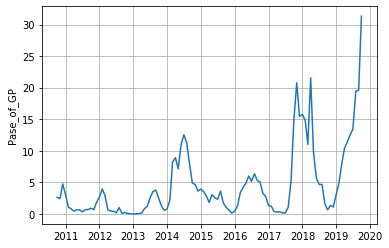

In [17]:
plt.close()
plt.plot(result_crab['pase_GP'])
plt.ylabel('Pase_of_GP')
plt.grid()
plt.plot()
#plt.savefig('res_crab_2010_2018.png', format='png', dpi=150)

In [18]:
# статистика по всем импульсам
gp_table['Time_series'] = pd.to_datetime(gp_table['Date'], format='%d.%m.%Y', errors='ignore')
gp_table_full = gp_table.set_index('Time_series')

In [19]:
gp_crab_m_full = gp_table_full['Count of GP, u'].resample('M').sum().to_frame()
gp_crab_m_ses = crab_sessoins['Session'].resample('M').sum().to_frame()
result_crab = gp_crab_m_full.join(gp_crab_m_ses, how='outer')

In [20]:
result_crab['pase_GP']  = np.divide(
    result_crab['Count of GP, u'], 
    result_crab['Session']*3.3841152) # в минутах

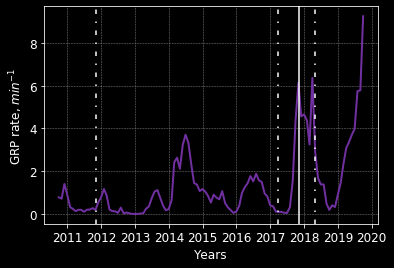

In [21]:
COLOR = 'white'
plt.close()
fig = plt.Figure()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR

plt.close()
plt.ylabel(r'GRP rate, $min^{-1}$')
plt.xlabel('Years')
plt.plot(result_crab['pase_GP'], color='#7030A0', lw=2)
plt.axvline('2011-11-10', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='w') # strongest glitch
plt.axvline('2018-04-29', color='w', ls=(0, (3, 5, 1, 5)))
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('gp_rate.png', format='png', dpi=300, facecolor=fig.get_facecolor())
#plt.plot()

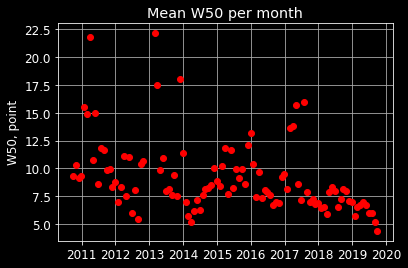

In [22]:
plt.close()
plt.title('Mean W50 per month')
plt.plot(gp_table_full['W50, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W50, point')
plt.grid()
plt.show()

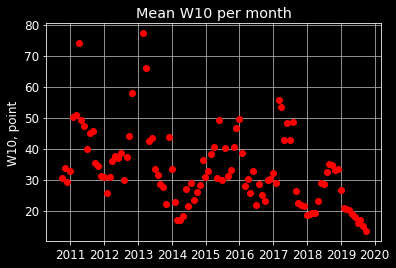

In [23]:
plt.close()
plt.title('Mean W10 per month')
plt.plot(gp_table_full['W10, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W10, point')
plt.grid()
plt.show()

## Перерасчет W10 и W50 нормированных импульсов.

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


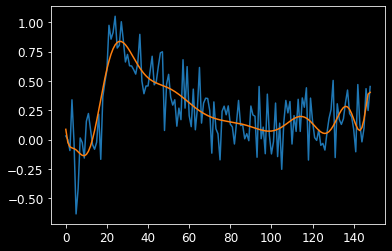

In [24]:
profile = np.genfromtxt(gp_table_full['fName'][0], skip_header=7)
normal_pulse = profile/max(profile)
cor_noise = normal_pulse[:5]
media = np.median(cor_noise)
normal_pulse -= media
plt.close()
plt.plot(normal_pulse)
plt.plot(flatter(normal_pulse, polynomialOrder=19))
plt.show()

In [25]:
gp_table_full['New W10, point'] = None
gp_table_full['New W50, point'] = None

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    normal_pulse = profile/max(profile)
    cor_noise = normal_pulse[:5]
    media = np.median(cor_noise)
    normal_pulse -= media
    normal_pulse = flatter(normal_pulse, polynomialOrder=19)
    
    w10, _, _ =  width_of_pulse(normal_pulse, 0.1)
    w50, _, _ = width_of_pulse(normal_pulse, 0.5)
    
    gp_table_full['New W10, point'][idx] = w10
    gp_table_full['New W50, point'][idx] = w50

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is 

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/andr/.pyenv/versions/3.7.4/lib/pyt

In [26]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point"
Time_series,,,,,,,,,,,,,,,,,,,,
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,11420.0,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.738857,80.6378,34.3582
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,18010.0,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.671781,68.7682,32.4268
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,21354.0,371.206160,11.70395,49.80325,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.914835,132.504,22.0594
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,37243.0,165.326490,2.57025,25.17355,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.687821,45.7912,25.012
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,18130.0,131.834780,1.71350,15.39170,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.660661,47.6634,16.9386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74272.0,347.426975,3.29290,15.33955,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.621531,24.6124,15.5252
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,70890.0,344.727905,9.78930,12.39680,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.653695,77.108,15.4808
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,74102.0,323.043405,1.46765,11.94235,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647905,35.3794,13.9934


In [27]:
gp_table_full['New W50, point'] = pd.to_numeric(gp_table_full['New W50, point'])
gp_table_full['New W10, point'] = pd.to_numeric(gp_table_full['New W10, point'])

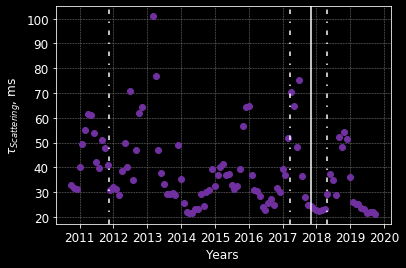

In [28]:
COLOR = 'white'
plt.close()
fig = plt.Figure()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR

plt.plot(gp_table_full['New W50, point'].resample('M').mean().to_frame()*1.44, 'o', color='#7030A0')
plt.axvline('2011-11-10', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-03-27', color='w', ls=(0, (3, 5, 1, 5)))
plt.axvline('2017-11-07', color='w') # strongest glitch
plt.axvline('2018-04-29', color='w', ls=(0, (3, 5, 1, 5)))
plt.ylabel(r'$\tau_{Scattering}$, ms')
plt.xlabel('Years')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('gp_scatter.png', format='png', dpi=300, facecolor=fig.get_facecolor())

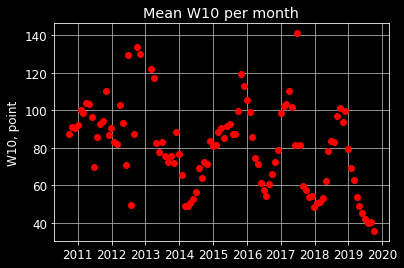

In [29]:
plt.close()
plt.title('Mean W10 per month')
plt.plot(gp_table_full['New W10, point'].resample('M').mean().to_frame(), 'ro')
plt.ylabel('W10, point')
plt.grid()
plt.show()

## Анализ W50 и W10 особо выделяющихся импульсов в итоговой(полной таблице)

In [198]:
gp_table_W_anomaly = gp_table_full.where(gp_table_full['New W10, point'] > 147).dropna().reset_index(drop=True)
gp_table_W_anomaly

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point"
0,30.12.2011,23:25:25.8979949,2.4576,5.992402,2430.0,34.0,1719.900515,10.080430,./final_dataset/\obs_data\30.12.2011_obs_0531+...,1.0,68190.0,51.265295,2.48830,17.38085,./final_dataset/gp_plot/30.12.2011_plot_0531+2...,./final_dataset/gp_plot_txt/30.12.2011_plot_05...,0.0,0.602379,147.1638,39.8416
1,17.05.2014,14:20:57.4927177,2.4576,5.998144,2438.0,34.0,1719.138445,19.237101,./final_dataset/\obs_data\17.05.2014_obs_0531+...,1.0,51046.0,45.504415,3.76225,16.65075,./final_dataset/gp_plot/17.05.2014_plot_0531+2...,./final_dataset/gp_plot_txt/17.05.2014_plot_05...,0.0,0.684616,147.4080,16.1764
2,28.01.2015,21:30:31.2519016,2.4576,5.999937,2439.0,34.0,1719.840280,12.237377,./final_dataset/\obs_data\28.01.2015_obs_0531+...,1.0,12271.0,69.236050,11.39105,41.42200,./final_dataset/gp_plot/28.01.2015_plot_0531+2...,./final_dataset/gp_plot_txt/28.01.2015_plot_05...,0.0,0.816800,147.1638,42.2392
3,23.09.2017,05:52:52.7157287,2.4576,6.005180,2442.0,34.0,1719.899855,3.942924,./final_dataset/\obs_data\23.09.2017_obs_0531+...,1.0,34128.0,15.520315,5.16285,7.93425,./final_dataset/gp_plot/23.09.2017_plot_0531+2...,./final_dataset/gp_plot_txt/23.09.2017_plot_05...,0.0,0.668359,148.0000,35.5200
4,07.11.2017,02:55:57.2139472,2.4576,6.005684,2442.0,34.0,1719.888295,6.359022,./final_dataset/\obs_data\07.11.2017_obs_0531+...,1.0,46858.0,25.744005,3.98575,13.13435,./final_dataset/gp_plot/07.11.2017_plot_0531+2...,./final_dataset/gp_plot_txt/07.11.2017_plot_05...,0.0,0.658916,147.7114,24.7974


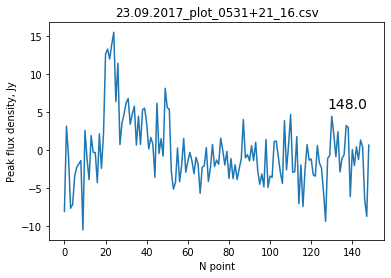

In [203]:
i = 3
file = gp_table_W_anomaly['fName'][i]
profile = np.genfromtxt(file, skip_header=7)
x = range(len(profile))
plt.close()
plt.title(os.path.basename(file))
plt.plot(profile)
plt.text(max(x) - 20, max(profile) - 10, round(gp_table_W_anomaly['New W10, point'][i], 2), fontsize=14)
plt.ylabel('Peak flux density, Jy')
plt.xlabel('N point')
plt.show()

## Анализ супер ярких импульсов в итоговой(полной таблице)

In [20]:
gp_table_real_gp = gp_table_full.where(gp_table_full['amp of gp, Jy'] > 500).dropna().reset_index(drop=True)
gp_table_real_gp

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u","point of gp, point","amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears
0,09.09.2010,06:48:41.8374290,2.4576,5.988578,2430.0,34.0,1719.351895,36.852202,./final_dataset/\obs_data_real_calib\09.09.201...,1.0,45640.0,553.959545,19.33275,54.60850,./final_dataset/gp_plot_real_calib/09.09.2010_...,./final_dataset/gp_plot_txt_real_calib/09.09.2...,0.0,0.943958
1,12.09.2010,06:36:54.1340866,2.4576,5.988594,2430.0,34.0,1719.485500,38.623575,./final_dataset/\obs_data_real_calib\12.09.201...,1.0,36629.0,573.799110,19.42215,63.82415,./final_dataset/gp_plot_real_calib/12.09.2010_...,./final_dataset/gp_plot_txt_real_calib/12.09.2...,0.0,0.918246
2,17.09.2010,06:17:14.6399831,2.4576,5.988624,2430.0,34.0,1719.561100,39.385654,./final_dataset/\obs_data_real_calib\17.09.201...,1.0,41855.0,542.719250,18.77400,39.25405,./final_dataset/gp_plot_real_calib/17.09.2010_...,./final_dataset/gp_plot_txt_real_calib/17.09.2...,0.0,0.941536
3,28.09.2010,05:33:59.7273254,2.4576,5.988705,2430.0,34.0,1719.984685,110.603460,./final_dataset/\obs_data_real_calib\28.09.201...,1.0,55908.0,576.251845,6.80930,24.21995,./final_dataset/gp_plot_real_calib/28.09.2010_...,./final_dataset/gp_plot_txt_real_calib/28.09.2...,0.0,0.683963
4,17.10.2010,04:19:17.6313152,2.4576,5.988894,2430.0,34.0,1719.437405,39.210923,./final_dataset/\obs_data_real_calib\17.10.201...,1.0,27361.0,824.364995,21.39640,59.65960,./final_dataset/gp_plot_real_calib/17.10.2010_...,./final_dataset/gp_plot_txt_real_calib/17.10.2...,0.0,0.956081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,14467.0,611.994295,3.62070,38.12165,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647110
1981,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,64582.0,611.626045,4.15710,10.69820,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.863559
1982,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,8444.0,605.560555,4.69350,18.90810,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.805278
1983,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,44427.0,565.348755,5.15540,11.58475,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.723227


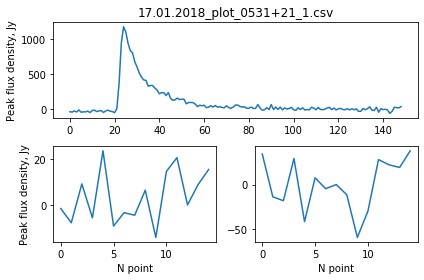

In [84]:
import matplotlib.gridspec as gridspec
for idx, fname in enumerate(gp_table_real_gp['fName']):
    profile = np.genfromtxt(fname, skip_header=7)
    x = range(len(profile))
    start_noise = profile[:15]
    end_noise = profile[-15:]
    
    plt.close()
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
    plt.figure()
    plt.subplot(gs[0, :])
    plt.title(os.path.basename(fname))
    plt.plot(profile)
    plt.ylabel('Peak flux density, Jy')
    plt.subplot(gs[1, 0])
    plt.plot(start_noise - np.median(start_noise))
    plt.ylabel('Peak flux density, Jy')
    plt.xlabel('N point')
    plt.subplot(gs[1, 1])
    plt.plot(end_noise - np.median(end_noise))
    plt.xlabel('N point')
    plt.tight_layout()
    plt.savefig('./final_dataset/GP_500/' + os.path.basename(fname)[:-4] + '.png', format='png', dpi=150)

## Анализ корреляции амплитуд шума в начале и конце записи, а также амплитуды импульса.

In [21]:
table_param_pulses = pd.DataFrame(columns=['Data', 'ampl', 'start_no', 'end_no'])

for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    
    start_noise = profile[:10]
    end_noise = profile[-20:]

    table_param_pulses.loc[idx] = [
        gp_table_full['Date'][idx],
        gp_table_full['amp of gp, Jy'][idx],
        np.std(start_noise),
        np.std(end_noise)
    ]

In [22]:
table_param_pulses

,Data,ampl,start_no,end_no
0,04.09.2010,179.859550,45.263973,32.606699
1,04.09.2010,161.100140,24.392539,40.203118
2,05.09.2010,371.206160,36.230926,34.908885
3,05.09.2010,165.326490,33.131424,24.726435
4,05.09.2010,131.834780,21.295319,34.466197
...,...,...,...,...
9756,19.09.2019,347.426975,45.270603,48.164057
9757,19.09.2019,344.727905,47.171558,59.247898
9758,19.09.2019,323.043405,64.035637,72.700725
9759,19.09.2019,302.876425,59.574463,67.640290


In [29]:
table_param_pulses['Time_series'] = pd.to_datetime(table_param_pulses['Data'], format='%d.%m.%Y', errors='ignore')
table_param_pulses = table_param_pulses.set_index('Time_series')
table_param_pulses_m_ampl = table_param_pulses['ampl'].resample('M').median().to_frame()
table_param_pulses_m_start_no = table_param_pulses['start_no'].resample('M').median().to_frame()
table_param_pulses_m_end_no = table_param_pulses['end_no'].resample('M').median().to_frame()

In [47]:
table_param_pulses['2018-12-01':'2018-12-30']

,Data,ampl,start_no,end_no
Time_series,,,,
2018-12-02,02.12.2018,423.657565,74.810563,72.883559
2018-12-03,03.12.2018,630.248645,110.800407,81.101568
2018-12-04,04.12.2018,830.857110,61.734858,53.322111
2018-12-04,04.12.2018,463.674170,59.367937,95.032416
2018-12-04,04.12.2018,387.558860,46.028087,60.332398
...,...,...,...,...
2018-12-30,30.12.2018,462.792500,77.907549,62.095791
2018-12-30,30.12.2018,410.331230,89.249405,59.950950
2018-12-30,30.12.2018,375.838870,62.687861,83.097032


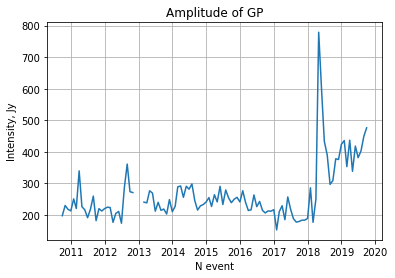

In [30]:
plt.close()
plt.title('Amplitude of GP')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_ampl)
plt.grid()
plt.show()

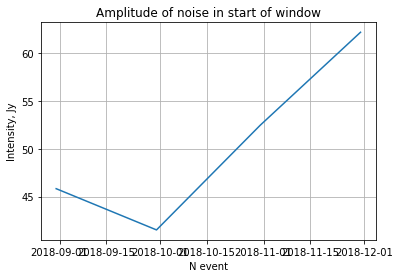

In [43]:
plt.close()
plt.title('Amplitude of noise in start of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_start_no['2018-08-01':'2018-12-30'])
plt.grid()
#plt.xlim(2017, 2019)
plt.show()

In [46]:
table_param_pulses_m_start_no['2019-01-01':'2019-01-31']

,start_no
Time_series,
2019-01-31,53.190078


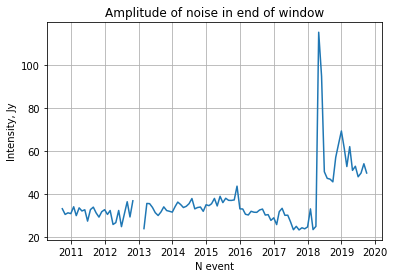

In [32]:
plt.close()
plt.title('Amplitude of noise in end of window')
plt.ylabel('Intensity, Jy')
plt.xlabel('N event')
plt.plot(table_param_pulses_m_end_no)
plt.grid()
plt.show()

In [33]:
table_param_pulses.corr()

,ampl,start_no,end_no
ampl,1.000000,0.414014,0.442723
start_no,0.414014,1.000000,0.840294
end_no,0.442723,0.840294,1.000000


## Отрисовка импульсов из финальной таблицы

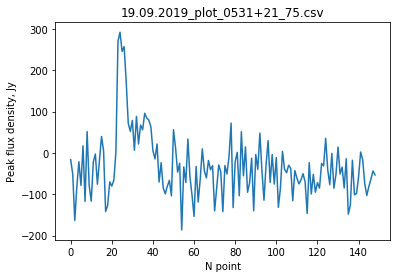

In [28]:
for idx, file in enumerate(gp_table_full['fName']):
    profile = np.genfromtxt(file, skip_header=7)
    plt.close()
    plt.title(os.path.basename(file))
    plt.plot(profile)
    plt.ylabel('Peak flux density, Jy')
    plt.xlabel('N point')
    plt.savefig(f'.\\final_dataset\\gp_plot_final_real_calib\\{idx}.png', format='png')

## Добавление необходимых колонок

In [30]:
# Добавление колонки MJD в таблицу ГИ
gp_table_full['MJD'] = None
for index, row in gp_table_full.iterrows():
    day, month, year = row['Date'].split('.')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time start'], precision=7)
            - 4*u.hour
            + row['point of gp, point']*float(row['Tay, ms'])*u.millisecond)
    gp_table_full['MJD'].loc[index] = str(time_utc.mjd)

/home/andr/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,"amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point",MJD
Time_series,,,,,,,,,,,,,,,,,,,,,
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,...,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.738857,80.6378,34.3582,55443.13131446663
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,...,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.671781,68.7682,32.4268,55443.13131446663
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,371.206160,11.70395,49.80325,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.914835,132.5044,22.0594,55444.12858767375
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,165.326490,2.57025,25.17355,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.687821,45.7912,25.0120,55444.12858767375
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,131.834780,1.71350,15.39170,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.660661,47.6634,16.9386,55444.12858767375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,347.426975,3.29290,15.33955,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.621531,24.6124,15.5252,58745.092162795576
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,344.727905,9.78930,12.39680,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.653695,77.1080,15.4808,58745.092162795576
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,323.043405,1.46765,11.94235,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647905,35.3794,13.9934,58745.092162795576


In [32]:
# Добавление колонки MJD в таблицу сеансов
crab_sessoins['MJD'] = None
for index, row in crab_sessoins.iterrows():
    year, month, day  = row['Date'].split('-')
    time_utc = (Time('{}-{}-{}T'.format(year, month, day) + row['Time_start'], precision=7)
            - 4*u.hour)
    crab_sessoins['MJD'].loc[index] = str(time_utc.mjd)

In [33]:
crab_sessoins

,Date,Time_start,Session,MJD
Time_series,,,,
2010-02-13,2010-02-13,20:26:28.9413394,1,55240.685057191426
2010-09-04,2010-09-04,07:08:21.3085403,1,55443.13080218218
2010-09-05,2010-09-05,07:04:25.4187240,1,55444.128071975974
2010-09-06,2010-09-06,07:00:29.5241603,1,55445.12534171482
2010-09-07,2010-09-07,06:56:33.6273651,1,55446.12261142784
...,...,...,...,...
2019-09-10,2019-09-10,06:46:00.8620910,1,58736.11528775568
2019-09-16,2019-09-16,06:22:25.4621543,1,58742.098905811974
2019-09-17,2019-09-17,06:18:29.5828304,1,58743.0961757272


In [34]:
gp_table_full

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, Jy","STD, Jy",path obs data,"Count of GP, u",...,"amp of gp, Jy","W50, point","W10, point",path plot,fName,zeros_ends,pears,"New W10, point","New W50, point",MJD
Time_series,,,,,,,,,,,,,,,,,,,,,
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,...,179.859550,17.00090,30.15760,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.738857,80.6378,34.3582,55443.13131446663
2010-09-04,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430.0,34.0,1719.494200,36.824686,./final_dataset/\obs_data_real_calib\04.09.201...,1.0,...,161.100140,8.15030,39.28385,./final_dataset/gp_plot_real_calib/04.09.2010_...,./final_dataset/gp_plot_txt_real_calib/04.09.2...,0.0,0.671781,68.7682,32.4268,55443.13131446663
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,371.206160,11.70395,49.80325,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.914835,132.5044,22.0594,55444.12858767375
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,165.326490,2.57025,25.17355,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.687821,45.7912,25.0120,55444.12858767375
2010-09-05,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430.0,34.0,1719.276050,37.203063,./final_dataset/\obs_data_real_calib\05.09.201...,1.0,...,131.834780,1.71350,15.39170,./final_dataset/gp_plot_real_calib/05.09.2010_...,./final_dataset/gp_plot_txt_real_calib/05.09.2...,0.0,0.660661,47.6634,16.9386,55444.12858767375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,347.426975,3.29290,15.33955,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.621531,24.6124,15.5252,58745.092162795576
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,344.727905,9.78930,12.39680,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.653695,77.1080,15.4808,58745.092162795576
2019-09-19,19.09.2019,06:10:37.7614097,2.4576,6.009864,2442.0,34.0,1718.809775,100.148369,./final_dataset/\obs_data_real_calib\19.09.201...,1.0,...,323.043405,1.46765,11.94235,./final_dataset/gp_plot_real_calib/19.09.2019_...,./final_dataset/gp_plot_txt_real_calib/19.09.2...,0.0,0.647905,35.3794,13.9934,58745.092162795576


In [35]:
# Добавление колонки энергии в таблицу ГИ
gp_table_full['E, Jy*ms']  = (
    (gp_table_full['amp of gp, Jy'] + gp_table_full['Median, Jy'])
    *  gp_table_full['W50, point']
    * gp_table_full['Tay, ms'])

In [36]:
# Добавление колонки энергии в таблицу ГИ расчитанную по новым значениям ширины
gp_table_full['New E, Jy*ms']  = (
    (gp_table_full['amp of gp, Jy'] + gp_table_full['Median, Jy'])
    *  gp_table_full['New W50, point']
    * gp_table_full['Tay, ms'])

In [38]:
gp_pulses_to_save = gp_table_full[['Date',
                                   'Time start',
                                   'MJD',
                                   'Median, Jy',
                                   'amp of gp, Jy',
                                   'W50, point',
                                   'W10, point',
                                   'New W50, point',
                                   'New W10, point',
                                   'E, Jy*ms',
                                   'New E, Jy*ms',
                                   'Tay, ms',
                                   'STD, Jy',]]

In [39]:
crab_sessoins_to_save = crab_sessoins[[
    'Date',
    'Time_start',
    'MJD',
    'Session'
]]

In [40]:
gp_pulses_to_save.to_csv('crab_gp_kaz_pulses_2020.01.20.csv',  sep='\t', header=True, index=False)
crab_sessoins_to_save.to_csv('crab_session_kaz_2020.01.20.csv',  sep='\t', header=True, index=False)